# Data Exploration

## Load Libraries

In [1]:
library(dplyr)
library(tidyr)
library(IDPmisc)
library(ggplot2)
library(gridExtra) # plots side by side in 1 cell


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Import Data
* Data from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts which was collected during three examination periods, approximately 6 years apart, from roughly 1956 to 1968
* The data was retrieved from the (BioLINCC)[https://biolincc.nhlbi.nih.gov/teaching/]
* Disclaimer: This is teaching data that has been rendered anonymous through the application of certain statistical processes such as permutations and/or random visit selection. We cannot claim or imply that any inferences derived from the teaching datasets are valid estimates

## Data Dictionary

|Variable|Description|Levels (if applicable)/<br> Notes|
| --- | --- |---|
|RANDID | Unique identification number for each participant||
|SEX | Participant sex |1=Men <br> 2=Women|
|PERIOD|Examination Cycle|1=Period 1 <br> 2=Period 2 <br> 3=Period 3|
|TIME| Number of days since baseline exam||
|AGE|Age at exam (years)||
|SYSBP|Systolic Blood Pressure (mean of last two of three <br> measurements) (mmHg)|
|DIABP|Diastolic Blood Pressure (mean of last two of three <br> measurements) (mmHg)|
|BPMEDS|Use of Anti-hypertensive medication at exam|0=Not currently used <br> 1=Current Use|
|CURSMOKE|Current cigarette smoking at exam|0=Not current smoker <br> 1=Current smoker|
|CIGPDAY|Number of cigarettes smoked each day|0=Not current smoker <br> 1-90 cigarettes per day|
|TOTCHOL|Serum Total Cholesterol (mg/dL)||
|HDLC|High Density Lipoprotein Cholesterol (mg/dL)|available for period 3 only|
|LDLC|Low Density Lipoprotein Cholesterol (mg/dL)|available for period 3 only|
|BMI|Body Mass Index, weight in kilograms/height <br> meters squared||
|GLUCOSE|Casual serum glucose (mg/dL)||
|DIABETES|Diabetic according to criteria of first exam <br> treated or first exam with casual glucose <br> of 200 mg/dL or more|0=Not a diabetic <br> 1=Diabetic|
|HEARTRTE|Heart rate (Ventricular rate) in beats/min|
|PREVAP|Prevalent Angina Pectoris at exam|0=Free of disease <br> 1=Prevalent disease|
|PREVCHD|Prevalent Coronary Heart Disease defined <br> as pre-existing Angina Pectoris, Myocardial <br>Infarction (hospitalized, silent or unrecognized),<br> or Coronary Insufficiency (unstable angina)|0=Free of disease <br> 1=Prevalent disease|
|PREVMI|Prevalent Myocardial Infarction|0=Free of disease <br> 1=Prevalent disease|
|PREVSTRK|Prevalent Stroke|0=Free of disease <br>1=Prevalent disease|
|PREVHYP|Prevalent Hypertensive. Subject was defined as <br> hypertensive if treated or if second exam at <br>which mean systolic was >=140 mmHg or mean<br>  Diastolic >=90 mmHg|0=Free of disease <br> 1=Prevalent disease|
|HOSPMI|Hospitalized Myocardial Infarction| |
|ANYCHD|Angina Pectoris, <br> Myocardial infarction (Hospitalized and silent or unrecognized), <br>Coronary Insufficiency (Unstable Angina), <br> or Fatal Coronary Heart Disease|0=Event did not occur during follow up <br> 1=Event occurred during followup|
|STROKE|Atherothrombotic infarction, <br>Cerebral Embolism, <br>Intracerebral Hemorrhage, <br> or Subarachnoid Hemorrhage, <br> or Fatal Cerebrovascular Disease|0=Event did not occur during follow up <br> 1=Event occurred during followup|
|DEATH|Death from any cause|0=Event did not occur during follow up <br> 1=Event occurred during followup|

In [8]:
heart = read.csv('/Users/silviacatalina/Google Drive/BethelTech/DS0110-FinalProject/Framingham/Data/csv/frmgham2.csv')
head(heart)

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,⋯,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2448,1,195,39,106.0,70.0,0,0,26.97,0,⋯,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,2448,1,209,52,121.0,66.0,0,0,NA,0,⋯,1,0,8766,6438,6438,6438,8766,6438,8766,8766
3,6238,2,250,46,121.0,81.0,0,0,28.73,0,⋯,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,260,52,105.0,69.5,0,0,29.43,0,⋯,0,0,8766,8766,8766,8766,8766,8766,8766,8766
5,6238,2,237,58,108.0,66.0,0,0,28.50,0,⋯,0,0,8766,8766,8766,8766,8766,8766,8766,8766
6,9428,1,245,48,127.5,80.0,1,20,25.34,0,⋯,0,0,8766,8766,8766,8766,8766,8766,8766,8766


In [9]:
str(heart)

'data.frame':	11627 obs. of  39 variables:
 $ RANDID  : int  2448 2448 6238 6238 6238 9428 9428 10552 10552 11252 ...
 $ SEX     : int  1 1 2 2 2 1 1 2 2 2 ...
 $ TOTCHOL : int  195 209 250 260 237 245 283 225 232 285 ...
 $ AGE     : int  39 52 46 52 58 48 54 61 67 46 ...
 $ SYSBP   : num  106 121 121 105 108 ...
 $ DIABP   : num  70 66 81 69.5 66 80 89 95 109 84 ...
 $ CURSMOKE: int  0 0 0 0 0 1 1 1 1 1 ...
 $ CIGPDAY : int  0 0 0 0 0 20 30 30 20 23 ...
 $ BMI     : num  27 NA 28.7 29.4 28.5 ...
 $ DIABETES: int  0 0 0 0 0 0 0 0 0 0 ...
 $ BPMEDS  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HEARTRTE: int  80 69 95 80 80 75 75 65 60 85 ...
 $ GLUCOSE : int  77 92 76 86 71 70 87 103 89 85 ...
 $ educ    : int  4 4 2 2 2 1 1 3 3 3 ...
 $ PREVCHD : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVAP  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVMI  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVSTRK: int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVHYP : int  0 0 0 0 0 0 0 1 1 0 ...
 $ TIME    : int  0 4628 0 2156 4344 0 2199 0 1977 0 ...

In [10]:
colSums(is.na(heart))

RANDID      SEX  TOTCHOL      AGE    SYSBP    DIABP CURSMOKE  CIGPDAY 
       0        0      409        0        0        0        0       79 
     BMI DIABETES   BPMEDS HEARTRTE  GLUCOSE     educ  PREVCHD   PREVAP 
      52        0      593        6     1440      295        0        0 
  PREVMI PREVSTRK  PREVHYP     TIME   PERIOD     HDLC     LDLC    DEATH 
       0        0        0        0        0     8600     8601        0 
  ANGINA   HOSPMI  MI_FCHD   ANYCHD   STROKE      CVD HYPERTEN   TIMEAP 
       0        0        0        0        0        0        0        0 
  TIMEMI TIMEMIFC  TIMECHD TIMESTRK  TIMECVD  TIMEDTH  TIMEHYP 
       0        0        0        0        0        0        0

## Subset data into periods

### Period 1 (baseline)

In [11]:
heartP1 = heart[heart$PERIOD == 1,]
str(heartP1)

'data.frame':	4434 obs. of  39 variables:
 $ RANDID  : int  2448 6238 9428 10552 11252 11263 12629 12806 14367 16365 ...
 $ SEX     : int  1 2 1 2 2 2 2 2 1 1 ...
 $ TOTCHOL : int  195 250 245 225 285 228 205 313 260 225 ...
 $ AGE     : int  39 46 48 61 46 43 63 45 52 43 ...
 $ SYSBP   : num  106 121 128 150 130 ...
 $ DIABP   : num  70 81 80 95 84 110 71 71 89 107 ...
 $ CURSMOKE: int  0 0 1 1 1 0 0 1 0 1 ...
 $ CIGPDAY : int  0 0 20 30 23 0 0 20 0 30 ...
 $ BMI     : num  27 28.7 25.3 28.6 23.1 ...
 $ DIABETES: int  0 0 0 0 0 0 0 0 0 0 ...
 $ BPMEDS  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HEARTRTE: int  80 95 75 65 85 77 60 79 76 93 ...
 $ GLUCOSE : int  77 76 70 103 85 99 85 78 79 88 ...
 $ educ    : int  4 2 1 3 3 2 1 2 1 1 ...
 $ PREVCHD : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVAP  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVMI  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVSTRK: int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVHYP : int  0 0 0 1 0 1 0 0 1 1 ...
 $ TIME    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PERIOD 

### Period 1 Data Wrangling
* Remove HDLC and LDLC, which were only collected in Period 3
* Remove NAs

In [12]:
heartP1 = subset(heartP1, select =-c(HDLC, LDLC))
colSums(is.na(heartP1))

RANDID      SEX  TOTCHOL      AGE    SYSBP    DIABP CURSMOKE  CIGPDAY 
       0        0       52        0        0        0        0       32 
     BMI DIABETES   BPMEDS HEARTRTE  GLUCOSE     educ  PREVCHD   PREVAP 
      19        0       61        1      397      113        0        0 
  PREVMI PREVSTRK  PREVHYP     TIME   PERIOD    DEATH   ANGINA   HOSPMI 
       0        0        0        0        0        0        0        0 
 MI_FCHD   ANYCHD   STROKE      CVD HYPERTEN   TIMEAP   TIMEMI TIMEMIFC 
       0        0        0        0        0        0        0        0 
 TIMECHD TIMESTRK  TIMECVD  TIMEDTH  TIMEHYP 
       0        0        0        0        0

In [13]:
heartP1 = NaRV.omit(heartP1)
str(heartP1)

'data.frame':	3826 obs. of  37 variables:
 $ RANDID  : int  2448 6238 9428 10552 11252 11263 12629 12806 14367 16365 ...
 $ SEX     : int  1 2 1 2 2 2 2 2 1 1 ...
 $ TOTCHOL : int  195 250 245 225 285 228 205 313 260 225 ...
 $ AGE     : int  39 46 48 61 46 43 63 45 52 43 ...
 $ SYSBP   : num  106 121 128 150 130 ...
 $ DIABP   : num  70 81 80 95 84 110 71 71 89 107 ...
 $ CURSMOKE: int  0 0 1 1 1 0 0 1 0 1 ...
 $ CIGPDAY : int  0 0 20 30 23 0 0 20 0 30 ...
 $ BMI     : num  27 28.7 25.3 28.6 23.1 ...
 $ DIABETES: int  0 0 0 0 0 0 0 0 0 0 ...
 $ BPMEDS  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HEARTRTE: int  80 95 75 65 85 77 60 79 76 93 ...
 $ GLUCOSE : int  77 76 70 103 85 99 85 78 79 88 ...
 $ educ    : int  4 2 1 3 3 2 1 2 1 1 ...
 $ PREVCHD : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVAP  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVMI  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVSTRK: int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVHYP : int  0 0 0 1 0 1 0 0 1 1 ...
 $ TIME    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PERIOD 

## Histograms of the Continuous Variables

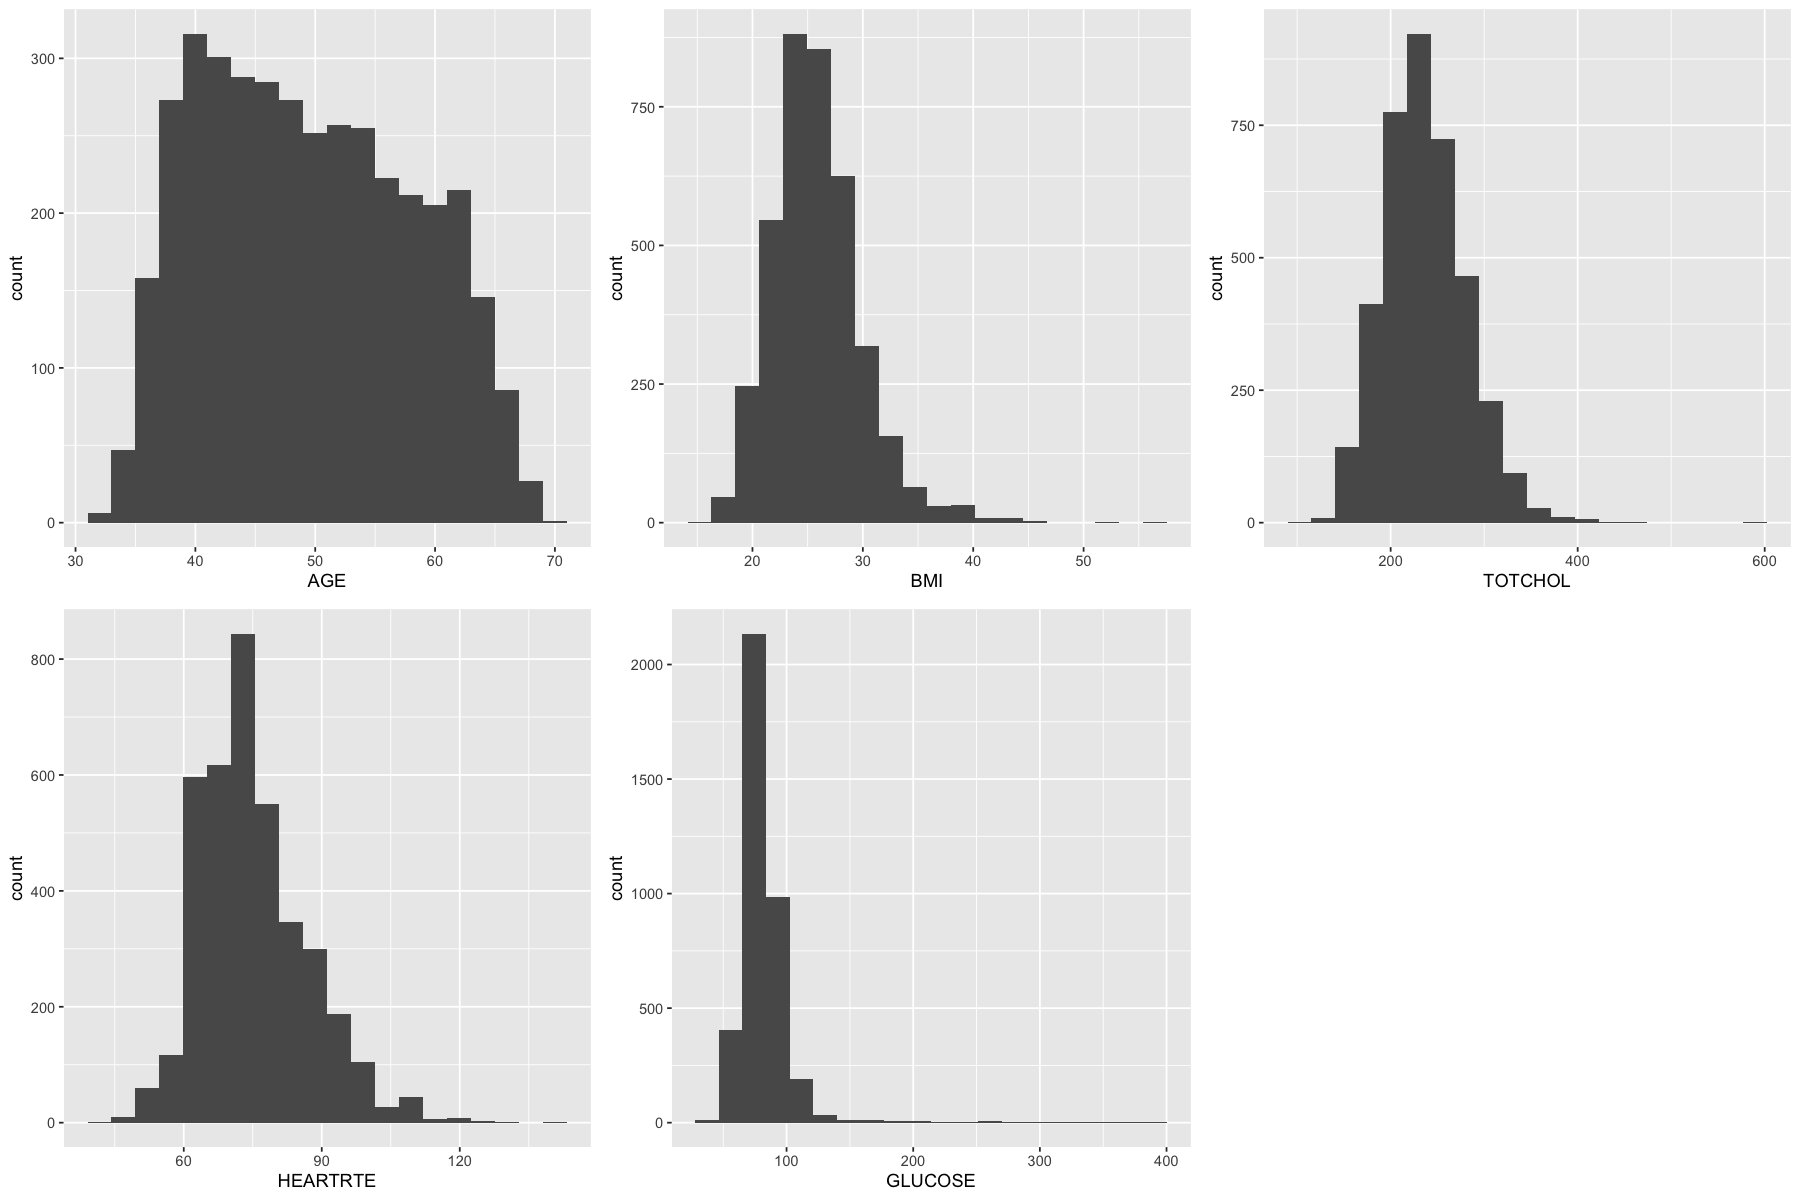

In [22]:
options(repr.plot.width=15, repr.plot.height=10)
plot1 = ggplot(heartP1, aes(x = AGE)) + geom_histogram(bins=20)
plot2 = ggplot(heartP1, aes(x = BMI)) + geom_histogram(bins=20)
plot3 = ggplot(heartP1, aes(x = TOTCHOL)) + geom_histogram(bins=20)
plot4 = ggplot(heartP1, aes(x = HEARTRTE)) + geom_histogram(bins=20)
plot5 = ggplot(heartP1, aes(x = GLUCOSE)) + geom_histogram(bins=20)
grid.arrange(plot1, plot2, plot3, plot4, plot5, ncol=3)

### Period 2

In [27]:
heartP2 = heart[heart$PERIOD == 2,]
str(heartP2)

'data.frame':	3930 obs. of  39 variables:
 $ RANDID  : int  6238 9428 10552 11252 11263 12629 12806 14367 16365 16799 ...
 $ SEX     : int  2 1 2 2 2 2 2 1 1 2 ...
 $ TOTCHOL : int  260 283 232 343 230 220 NA 292 258 NA ...
 $ AGE     : int  52 54 67 51 49 70 51 58 49 56 ...
 $ SYSBP   : num  105 141 183 109 177 ...
 $ DIABP   : num  69.5 89 109 77 102 81 72.5 90 102 70 ...
 $ CURSMOKE: int  0 1 1 1 0 0 1 0 0 0 ...
 $ CIGPDAY : int  0 30 20 30 0 0 30 0 0 0 ...
 $ BMI     : num  29.4 25.3 30.2 23.5 31.4 ...
 $ DIABETES: int  0 0 0 0 0 0 0 0 0 0 ...
 $ BPMEDS  : int  0 0 0 0 1 0 0 0 1 0 ...
 $ HEARTRTE: int  80 75 60 90 120 80 75 85 75 60 ...
 $ GLUCOSE : int  86 87 89 72 86 98 NA 81 74 73 ...
 $ educ    : int  2 1 3 3 2 1 2 1 1 1 ...
 $ PREVCHD : int  0 0 0 0 0 1 0 0 0 0 ...
 $ PREVAP  : int  0 0 0 0 0 1 0 0 0 0 ...
 $ PREVMI  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVSTRK: int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVHYP : int  0 0 1 0 1 1 0 1 1 0 ...
 $ TIME    : int  2156 2199 1977 2072 2178 2212

### Period 1 Data Wrangling
* Remove HDLC and LDLC, which were only collected in Period 3
* Remove NAs

In [28]:
colSums(is.na(heartP2))

RANDID      SEX  TOTCHOL      AGE    SYSBP    DIABP CURSMOKE  CIGPDAY 
       0        0      143        0        0        0        0       33 
     BMI DIABETES   BPMEDS HEARTRTE  GLUCOSE     educ  PREVCHD   PREVAP 
      16        0       86        1      481      100        0        0 
  PREVMI PREVSTRK  PREVHYP     TIME   PERIOD     HDLC     LDLC    DEATH 
       0        0        0        0        0     3930     3930        0 
  ANGINA   HOSPMI  MI_FCHD   ANYCHD   STROKE      CVD HYPERTEN   TIMEAP 
       0        0        0        0        0        0        0        0 
  TIMEMI TIMEMIFC  TIMECHD TIMESTRK  TIMECVD  TIMEDTH  TIMEHYP 
       0        0        0        0        0        0        0

In [29]:
heartP2 = subset(heartP2, select =-c(HDLC, LDLC))
head(heartP2)

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,⋯,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
4,6238,2,260,52,105,69.5,0,0,29.43,0,⋯,0,0,8766,8766,8766,8766,8766,8766,8766,8766
7,9428,1,283,54,141,89.0,1,30,25.34,0,⋯,0,0,8766,8766,8766,8766,8766,8766,8766,8766
9,10552,2,232,67,183,109.0,1,20,30.18,0,⋯,1,1,2956,2956,2956,2956,2089,2089,2956,0
11,11252,2,343,51,109,77.0,1,30,23.48,0,⋯,0,1,8766,8766,8766,8766,8766,8766,8766,4285
14,11263,2,230,49,177,102.0,0,0,31.36,0,⋯,1,1,8766,8766,5719,5719,8766,5719,8766,0
17,12629,2,220,70,149,81.0,0,0,36.76,0,⋯,0,1,373,8766,8766,373,8766,8766,8766,2212


In [30]:
heartP2 = NaRV.omit(heartP2)
str(heartP2)

'data.frame':	3230 obs. of  37 variables:
 $ RANDID  : int  6238 9428 10552 11252 11263 12629 14367 16365 20375 23727 ...
 $ SEX     : int  2 1 2 2 2 2 1 1 1 2 ...
 $ TOTCHOL : int  260 283 232 343 230 220 292 258 288 225 ...
 $ AGE     : int  52 54 67 51 49 70 58 49 52 47 ...
 $ SYSBP   : num  105 141 183 109 177 149 132 147 165 120 ...
 $ DIABP   : num  69.5 89 109 77 102 81 90 102 92 80 ...
 $ CURSMOKE: int  0 1 1 1 0 0 0 0 1 0 ...
 $ CIGPDAY : int  0 30 20 30 0 0 0 0 10 0 ...
 $ BMI     : num  29.4 25.3 30.2 23.5 31.4 ...
 $ DIABETES: int  0 0 0 0 0 0 0 0 0 0 ...
 $ BPMEDS  : int  0 0 0 0 1 0 0 1 0 1 ...
 $ HEARTRTE: int  80 75 60 90 120 80 85 75 105 75 ...
 $ GLUCOSE : int  86 87 89 72 86 98 81 74 71 74 ...
 $ educ    : int  2 1 3 3 2 1 1 1 1 3 ...
 $ PREVCHD : int  0 0 0 0 0 1 0 0 0 0 ...
 $ PREVAP  : int  0 0 0 0 0 1 0 0 0 0 ...
 $ PREVMI  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVSTRK: int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVHYP : int  0 0 1 0 1 1 1 1 1 1 ...
 $ TIME    : int  2156 219

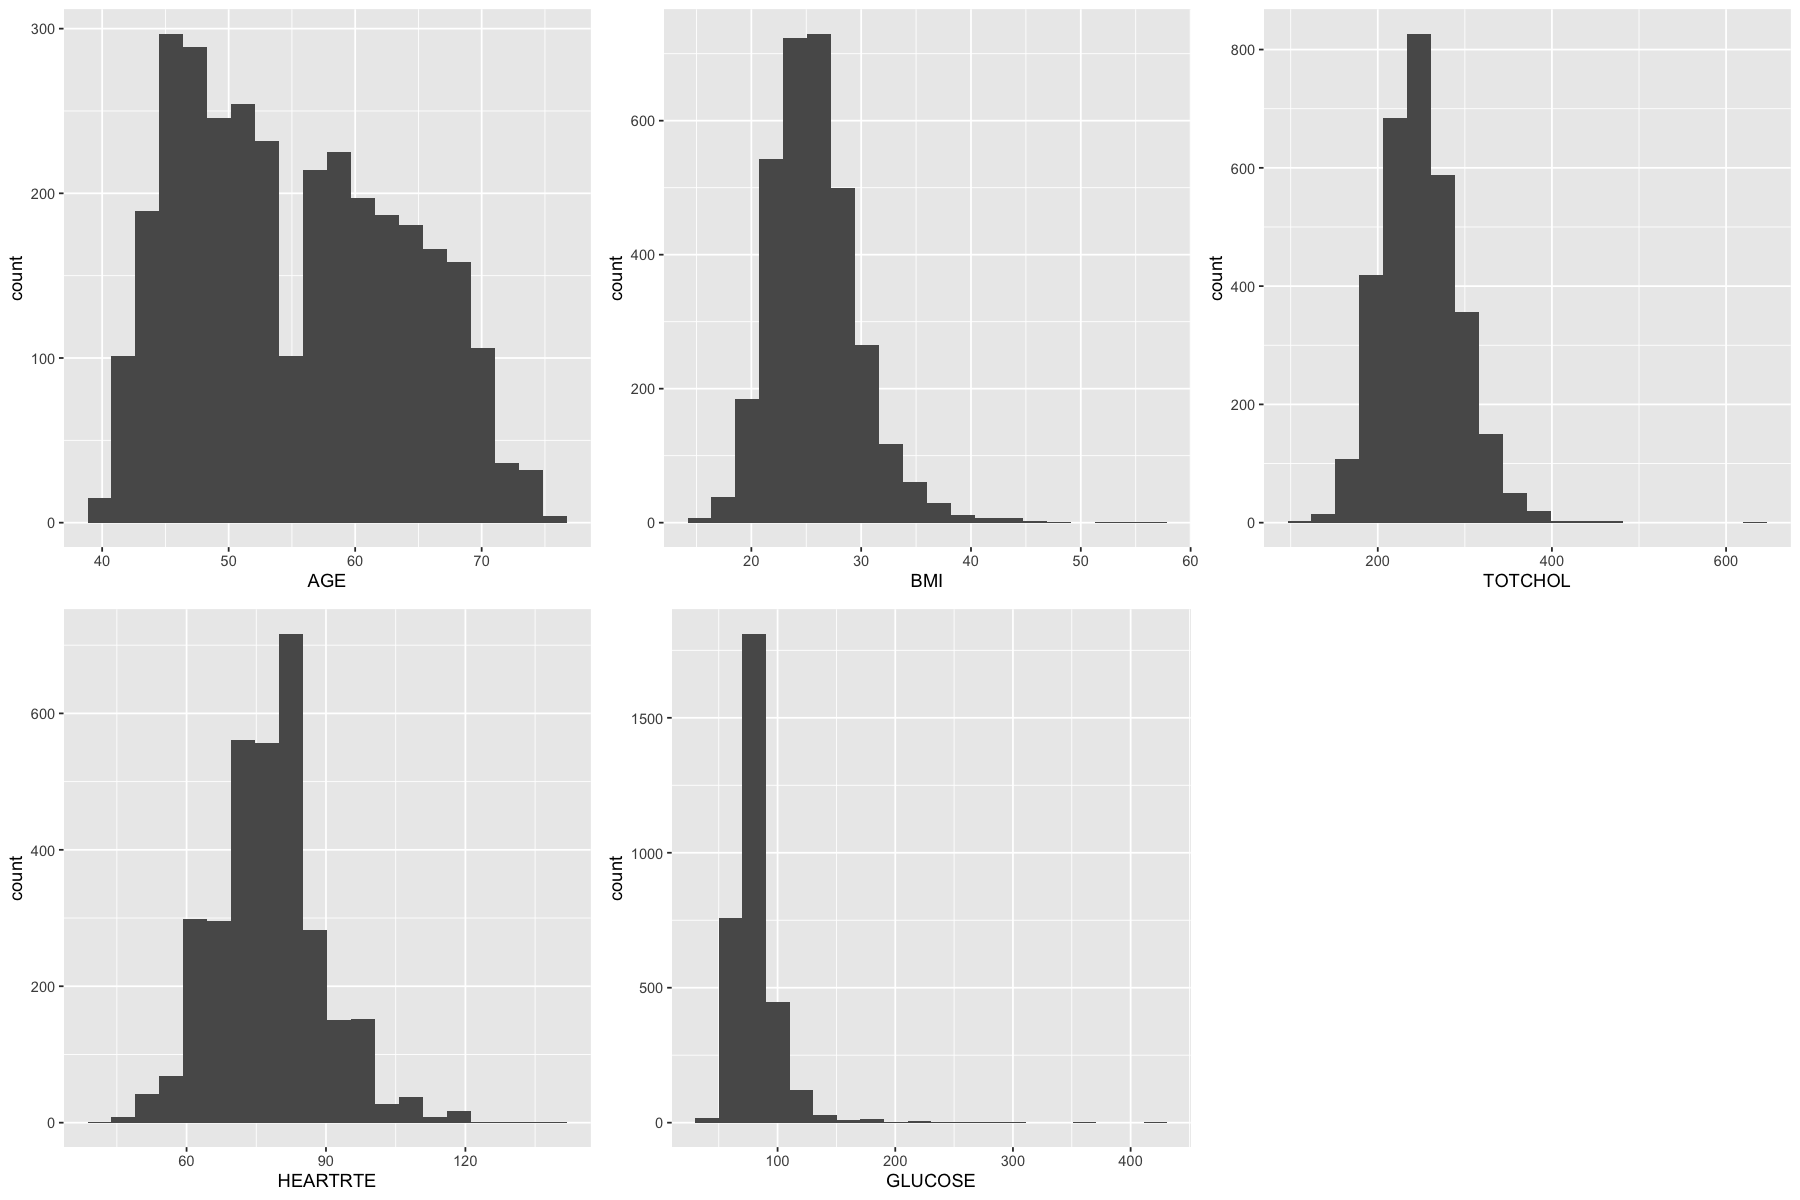

In [35]:
options(repr.plot.width=15, repr.plot.height=10)
plot1 = ggplot(heartP2, aes(x = AGE)) + geom_histogram(bins=20)
plot2 = ggplot(heartP2, aes(x = BMI)) + geom_histogram(bins=20)
plot3 = ggplot(heartP2, aes(x = TOTCHOL)) + geom_histogram(bins=20)
plot4 = ggplot(heartP2, aes(x = HEARTRTE)) + geom_histogram(bins=20)
plot5 = ggplot(heartP2, aes(x = GLUCOSE)) + geom_histogram(bins=20)
grid.arrange(plot1, plot2, plot3, plot4, plot5, ncol=3)

## Join period 1 and period 2

In [47]:
dfmerged1 = merge(heartP1, heartP2, by = "RANDID", suffixes = c(".P1", ".P2"))
str(dfmerged1)

'data.frame':	2893 obs. of  73 variables:
 $ RANDID     : int  6238 9428 10552 11252 11263 12629 14367 16365 20375 23727 ...
 $ SEX.P1     : int  2 1 2 2 2 2 1 1 1 2 ...
 $ TOTCHOL.P1 : int  250 245 225 285 228 205 260 225 294 332 ...
 $ AGE.P1     : int  46 48 61 46 43 63 52 43 46 41 ...
 $ SYSBP.P1   : num  121 128 150 130 180 ...
 $ DIABP.P1   : num  81 80 95 84 110 71 89 107 94 88 ...
 $ CURSMOKE.P1: int  0 1 1 1 0 0 0 1 1 0 ...
 $ CIGPDAY.P1 : int  0 20 30 23 0 0 0 30 15 0 ...
 $ BMI.P1     : num  28.7 25.3 28.6 23.1 30.3 ...
 $ DIABETES.P1: int  0 0 0 0 0 0 0 0 0 0 ...
 $ BPMEDS.P1  : int  0 0 0 0 0 0 0 0 0 1 ...
 $ HEARTRTE.P1: int  95 75 65 85 77 60 76 93 98 65 ...
 $ GLUCOSE.P1 : int  76 70 103 85 99 85 79 88 64 84 ...
 $ educ.P1    : int  2 1 3 3 2 1 1 1 1 3 ...
 $ PREVCHD.P1 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVAP.P1  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVMI.P1  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVSTRK.P1: int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVHYP.P1 : int  0 0 1 0 1 0 1 1 

### Period 3

In [48]:
heartP3 = heart[heart$PERIOD == 3,]
str(heartP3)

'data.frame':	3263 obs. of  39 variables:
 $ RANDID  : int  2448 6238 11252 11263 12806 14367 16365 16799 23727 24721 ...
 $ SEX     : int  1 2 2 2 2 1 1 2 2 2 ...
 $ TOTCHOL : int  209 237 NA 220 320 280 211 291 159 264 ...
 $ AGE     : int  52 58 58 55 57 64 55 62 53 51 ...
 $ SYSBP   : num  121 108 155 180 110 168 173 120 124 141 ...
 $ DIABP   : num  66 66 90 106 46 100 123 70 78 81 ...
 $ CURSMOKE: int  0 0 1 0 1 0 0 0 0 1 ...
 $ CIGPDAY : int  0 0 30 0 30 0 0 0 0 15 ...
 $ BMI     : num  NA 28.5 24.6 31.2 22 ...
 $ DIABETES: int  0 0 0 1 0 0 0 0 0 0 ...
 $ BPMEDS  : int  0 0 0 1 0 0 1 NA 0 0 ...
 $ HEARTRTE: int  69 80 74 86 75 92 75 62 68 85 ...
 $ GLUCOSE : int  92 71 NA 81 87 82 85 83 135 97 ...
 $ educ    : int  4 2 3 2 2 1 1 1 3 2 ...
 $ PREVCHD : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVAP  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVMI  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVSTRK: int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVHYP : int  0 0 1 1 0 1 1 0 1 1 ...
 $ TIME    : int  4628 4344 4285 4

In [49]:
colSums(is.na(heartP3))

RANDID      SEX  TOTCHOL      AGE    SYSBP    DIABP CURSMOKE  CIGPDAY 
       0        0      214        0        0        0        0       14 
     BMI DIABETES   BPMEDS HEARTRTE  GLUCOSE     educ  PREVCHD   PREVAP 
      17        0      446        4      562       82        0        0 
  PREVMI PREVSTRK  PREVHYP     TIME   PERIOD     HDLC     LDLC    DEATH 
       0        0        0        0        0      236      237        0 
  ANGINA   HOSPMI  MI_FCHD   ANYCHD   STROKE      CVD HYPERTEN   TIMEAP 
       0        0        0        0        0        0        0        0 
  TIMEMI TIMEMIFC  TIMECHD TIMESTRK  TIMECVD  TIMEDTH  TIMEHYP 
       0        0        0        0        0        0        0

## Merge period 3 with the other 2 periods

In [50]:
dfmerged2 = merge(dfmerged1, heartP3, by = "RANDID", suffixes = c(".M", ".P3"))
str(dfmerged2)

'data.frame':	2358 obs. of  111 variables:
 $ RANDID     : int  6238 11252 11263 14367 16365 23727 34689 36459 40435 43770 ...
 $ SEX.P1     : int  2 2 2 1 1 2 2 1 2 2 ...
 $ TOTCHOL.P1 : int  250 285 228 260 225 332 195 195 190 234 ...
 $ AGE.P1     : int  46 46 43 52 43 41 38 41 42 52 ...
 $ SYSBP.P1   : num  121 130 180 142 162 ...
 $ DIABP.P1   : num  81 84 110 89 107 88 84.5 88 70.5 78 ...
 $ CURSMOKE.P1: int  0 1 0 0 1 0 1 0 1 0 ...
 $ CIGPDAY.P1 : int  0 23 0 0 30 0 5 0 30 0 ...
 $ BMI.P1     : num  28.7 23.1 30.3 26.4 23.6 ...
 $ DIABETES.P1: int  0 0 0 0 0 0 0 0 0 0 ...
 $ BPMEDS.P1  : int  0 0 0 0 0 1 0 0 0 0 ...
 $ HEARTRTE.P1: int  95 85 77 76 93 65 75 85 72 70 ...
 $ GLUCOSE.P1 : int  76 85 99 79 88 84 78 65 85 113 ...
 $ educ.P1    : int  2 3 2 1 1 3 2 2 2 1 ...
 $ PREVCHD.P1 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVAP.P1  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVMI.P1  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVSTRK.P1: int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVHYP.P1 : int  0 0 1 1 1 1 

## Drop unnecessary columns

In [46]:
colSums(is.na(dfmerged2))

RANDID      SEX.P1  TOTCHOL.P1      AGE.P1    SYSBP.P1    DIABP.P1 
          0           0           0           0           0           0 
CURSMOKE.P1  CIGPDAY.P1      BMI.P1 DIABETES.P1   BPMEDS.P1 HEARTRTE.P1 
          0           0           0           0           0           0 
 GLUCOSE.P1     educ.P1  PREVCHD.P1   PREVAP.P1   PREVMI.P1 PREVSTRK.P1 
          0           0           0           0           0           0 
 PREVHYP.P1     TIME.P1   PERIOD.P1    DEATH.P1   ANGINA.P1   HOSPMI.P1 
          0           0           0           0           0           0 
 MI_FCHD.P1   ANYCHD.P1   STROKE.P1      CVD.P1 HYPERTEN.P1   TIMEAP.P1 
          0           0           0           0           0           0 
  TIMEMI.P1 TIMEMIFC.P1  TIMECHD.P1 TIMESTRK.P1  TIMECVD.P1  TIMEDTH.P1 
          0           0           0           0           0           0 
 TIMEHYP.P1      SEX.P2  TOTCHOL.P2      AGE.P2    SYSBP.P2    DIABP.P2 
          0         933         933         933         933         933 
CURSMOKE.P2  CIGPDAY.P2      BMI.P2 DIABETES.P2   BPMEDS.P2 HEARTRTE.P2 
        933         933         933         933         933         933 
 GLUCOSE.P2     educ.P2  PREVCHD.P2   PREVAP.P2   PREVMI.P2 PREVSTRK.P2 
        933         933         933         933         933         933 
 PREVHYP.P2     TIME.P2   PERIOD.P2    DEATH.P2   ANGINA.P2   HOSPMI.P2 
        933         933         933         933         933         933 
 MI_FCHD.P2   ANYCHD.P2   STROKE.P2      CVD.P2 HYPERTEN.P2   TIMEAP.P2 
        933         933         933         933         933         933 
  TIMEMI.P2 TIMEMIFC.P2  TIMECHD.P2 TIMESTRK.P2  TIMECVD.P2  TIMEDTH.P2 
        933         933         933         933         933         933 
 TIMEHYP.P2         SEX     TOTCHOL         AGE       SYSBP       DIABP 
        933        1011        1184        1011        1011        1011 
   CURSMOKE     CIGPDAY         BMI    DIABETES      BPMEDS    HEARTRTE 
       1011        1024        1024        1011        1426        1015 
    GLUCOSE        educ     PREVCHD      PREVAP      PREVMI    PREVSTRK 
       1498        1011        1011        1011        1011        1011 
    PREVHYP        TIME      PERIOD        HDLC        LDLC       DEATH 
       1011        1011        1011        1205        1206        1011 
     ANGINA      HOSPMI     MI_FCHD      ANYCHD      STROKE         CVD 
       1011        1011        1011        1011        1011        1011 
   HYPERTEN      TIMEAP      TIMEMI    TIMEMIFC     TIMECHD    TIMESTRK 
       1011        1011        1011        1011        1011        1011 
    TIMECVD     TIMEDTH     TIMEHYP 
       1011        1011        1011

In [60]:
heartMerged = subset(dfmerged2, select = -c(TIMEAP.P1, TIMEMI.P1, TIMEMIFC.P1, TIMECHD.P1, TIMESTRK.P1,TIMECVD.P1, 
                                            TIMEDTH.P1, TIMEHYP.P1, SEX.P2, TIMEAP.P2, TIMEMI.P2, TIMEMIFC.P2, TIMECHD.P2, 
                                            TIMESTRK.P2, TIMECVD.P2, TIMEDTH.P2, TIMEHYP.P2, SEX))
str(heartMerged)

'data.frame':	2358 obs. of  93 variables:
 $ RANDID     : int  6238 11252 11263 14367 16365 23727 34689 36459 40435 43770 ...
 $ SEX.P1     : int  2 2 2 1 1 2 2 1 2 2 ...
 $ TOTCHOL.P1 : int  250 285 228 260 225 332 195 195 190 234 ...
 $ AGE.P1     : int  46 46 43 52 43 41 38 41 42 52 ...
 $ SYSBP.P1   : num  121 130 180 142 162 ...
 $ DIABP.P1   : num  81 84 110 89 107 88 84.5 88 70.5 78 ...
 $ CURSMOKE.P1: int  0 1 0 0 1 0 1 0 1 0 ...
 $ CIGPDAY.P1 : int  0 23 0 0 30 0 5 0 30 0 ...
 $ BMI.P1     : num  28.7 23.1 30.3 26.4 23.6 ...
 $ DIABETES.P1: int  0 0 0 0 0 0 0 0 0 0 ...
 $ BPMEDS.P1  : int  0 0 0 0 0 1 0 0 0 0 ...
 $ HEARTRTE.P1: int  95 85 77 76 93 65 75 85 72 70 ...
 $ GLUCOSE.P1 : int  76 85 99 79 88 84 78 65 85 113 ...
 $ educ.P1    : int  2 3 2 1 1 3 2 2 2 1 ...
 $ PREVCHD.P1 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVAP.P1  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVMI.P1  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVSTRK.P1: int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVHYP.P1 : int  0 0 1 1 1 1 0

In [61]:
colSums(is.na(heartMerged))

RANDID      SEX.P1  TOTCHOL.P1      AGE.P1    SYSBP.P1    DIABP.P1 
          0           0           0           0           0           0 
CURSMOKE.P1  CIGPDAY.P1      BMI.P1 DIABETES.P1   BPMEDS.P1 HEARTRTE.P1 
          0           0           0           0           0           0 
 GLUCOSE.P1     educ.P1  PREVCHD.P1   PREVAP.P1   PREVMI.P1 PREVSTRK.P1 
          0           0           0           0           0           0 
 PREVHYP.P1     TIME.P1   PERIOD.P1    DEATH.P1   ANGINA.P1   HOSPMI.P1 
          0           0           0           0           0           0 
 MI_FCHD.P1   ANYCHD.P1   STROKE.P1      CVD.P1 HYPERTEN.P1  TOTCHOL.P2 
          0           0           0           0           0           0 
     AGE.P2    SYSBP.P2    DIABP.P2 CURSMOKE.P2  CIGPDAY.P2      BMI.P2 
          0           0           0           0           0           0 
DIABETES.P2   BPMEDS.P2 HEARTRTE.P2  GLUCOSE.P2     educ.P2  PREVCHD.P2 
          0           0           0           0           0           0 
  PREVAP.P2   PREVMI.P2 PREVSTRK.P2  PREVHYP.P2     TIME.P2   PERIOD.P2 
          0           0           0           0           0           0 
   DEATH.P2   ANGINA.P2   HOSPMI.P2  MI_FCHD.P2   ANYCHD.P2   STROKE.P2 
          0           0           0           0           0           0 
     CVD.P2 HYPERTEN.P2     TOTCHOL         AGE       SYSBP       DIABP 
          0           0         138           0           0           0 
   CURSMOKE     CIGPDAY         BMI    DIABETES      BPMEDS    HEARTRTE 
          0           9           7           0         363           2 
    GLUCOSE        educ     PREVCHD      PREVAP      PREVMI    PREVSTRK 
        417           0           0           0           0           0 
    PREVHYP        TIME      PERIOD        HDLC        LDLC       DEATH 
          0           0           0         158         159           0 
     ANGINA      HOSPMI     MI_FCHD      ANYCHD      STROKE         CVD 
          0           0           0           0           0           0 
   HYPERTEN      TIMEAP      TIMEMI    TIMEMIFC     TIMECHD    TIMESTRK 
          0           0           0           0           0           0 
    TIMECVD     TIMEDTH     TIMEHYP 
          0           0           0

## Dropping NAs

In [62]:
heartMerged = NaRV.omit(heartMerged)
str(heartMerged)

'data.frame':	1640 obs. of  93 variables:
 $ RANDID     : int  6238 11263 14367 16365 23727 34689 36459 40435 43770 45464 ...
 $ SEX.P1     : int  2 2 1 1 2 2 1 2 2 2 ...
 $ TOTCHOL.P1 : int  250 228 260 225 332 195 195 190 234 215 ...
 $ AGE.P1     : int  46 43 52 43 41 38 41 42 52 52 ...
 $ SYSBP.P1   : num  121 180 142 162 124 ...
 $ DIABP.P1   : num  81 110 89 107 88 84.5 88 70.5 78 82 ...
 $ CURSMOKE.P1: int  0 0 0 1 0 1 0 1 0 1 ...
 $ CIGPDAY.P1 : int  0 0 0 30 0 5 0 30 0 20 ...
 $ BMI.P1     : num  28.7 30.3 26.4 23.6 31.3 ...
 $ DIABETES.P1: int  0 0 0 0 0 0 0 0 0 0 ...
 $ BPMEDS.P1  : int  0 0 0 0 1 0 0 0 0 0 ...
 $ HEARTRTE.P1: int  95 77 76 93 65 75 85 72 70 71 ...
 $ GLUCOSE.P1 : int  76 99 79 88 84 78 65 85 113 75 ...
 $ educ.P1    : int  2 2 1 1 3 2 2 2 1 3 ...
 $ PREVCHD.P1 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVAP.P1  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVMI.P1  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVSTRK.P1: int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVHYP.P1 : int  0 1 1 1 1 0 0

## Merged dataset with one patient per row

In [43]:
head(dfmerged2)

,RANDID,SEX.P1,TOTCHOL.P1,AGE.P1,SYSBP.P1,DIABP.P1,CURSMOKE.P1,CIGPDAY.P1,BMI.P1,DIABETES.P1,⋯,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2448,1,195,39,106.0,70,0,0,26.97,0,⋯,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250,46,121.0,81,0,0,28.73,0,⋯,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,9428,1,245,48,127.5,80,1,20,25.34,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,10552,2,225,61,150.0,95,1,30,28.58,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,11252,2,285,46,130.0,84,1,23,23.10,0,⋯,0,1,8766,8766,8766,8766,8766,8766,8766,4285
6,11263,2,228,43,180.0,110,0,0,30.30,0,⋯,1,1,8766,8766,5719,5719,8766,5719,8766,0


In [ ]:
unique(heartUNQ$PERIOD)

_This is the same as heartP1_